In [28]:
import pandas
import json
import re
import numpy
from scipy.stats import norm
from matplotlib import pyplot
from scipy.stats import expon

data = pandas.read_csv('debates_cleaned1.csv')
words = set()
with open('keywords.json', 'r') as file:
  words = set(json.load(file))
with open('pacific_island_states.json', 'r') as file:
  islands = json.load(file)
with open('eu.json', 'r') as file:
  eu = json.load(file)

In [29]:
def count_keywords(tokens):
  counter = 0
  re.sub(r'[^\x20-\x7E]', '', tokens)
  for token in tokens.split():
    counter += 1 if token in words else 0
  return counter

In [30]:
data['keywords'] = data['tokens'].apply(count_keywords)
data = data.sort_values(by = 'keywords', ascending = False)
data

,session,year,country,text,tokens,keywords
4308,68,2013,DMA,"I would like to begin \nby congratulating you,...",would like begin congratul presid ash sister i...,47
4266,68,2013,TUV,It is a great honour and \npleasure to partici...,great honour pleasur particip sixty-eighth ses...,43
3753,65,2010,TJK,I would like to \ncongratulate Mr. Joseph Deis...,would like congratul mr. joseph deiss elect pr...,42
4275,68,2013,FSM,I am pleased to join previous \nspeakers in co...,pleas join previou speaker congratul presid el...,42
3659,65,2010,GUY,I bring to all delegates at this \nsixty-fifth...,bring deleg sixty-fifth session gener assembl ...,41
...,...,...,...,...,...,...
2663,59,2004,MCO,It is with great pleasure that I congratulate\...,great pleasur congratul sir unanim elect presi...,0
2664,59,2004,BHR,"Mr. President, at the\noutset, I have the plea...",mr. presid outset pleasur extend sincer congra...,0
2665,60,2005,LBY,It gives me great pleasure at the outset to\na...,give great pleasur outset affirm deleg confid ...,0
1075,51,1996,COG,﻿The delegation of the Republic of the Congo\n...,﻿the deleg republ congo wish express presid wa...,0


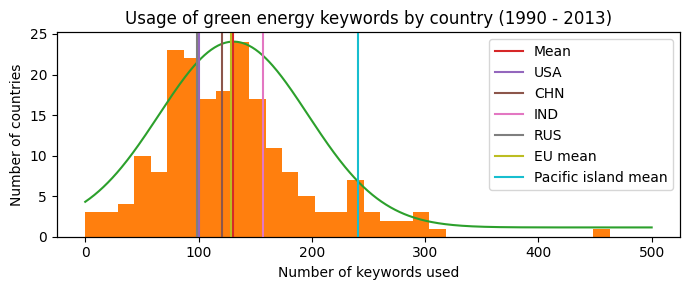

In [31]:
grouped = data.groupby(by='country')['keywords'].sum()
avg = grouped.mean()
std = abs(grouped.std())
x = numpy.linspace(0, 500, 500)

_, ax1 = pyplot.subplots(figsize = (7, 3))
ax1.hist(grouped, bins = 32, color = 'C1')

ax2 = ax1.twinx()
ax2.plot(x, norm.pdf(x, avg, std), color = 'C2')
ax2.tick_params(axis = 'y', length=  0)
ax2.set_yticklabels([])

pyplot.axvline(avg, color = 'C3', label = 'Mean')
pyplot.axvline(grouped.loc['USA'], color = 'C4', label = 'USA')
pyplot.axvline(grouped.loc['CHN'], color = 'C5', label = 'CHN')
pyplot.axvline(grouped.loc['IND'], color = 'C6', label = 'IND')
pyplot.axvline(grouped.loc['RUS'], color = 'C7', label = 'RUS')
pyplot.axvline(grouped.loc[eu].mean(), color = 'C8', label = 'EU mean')
pyplot.axvline(grouped.loc[islands].mean(), color = 'C9', label = 'Pacific island mean')

pyplot.title('Usage of green energy keywords by country (1990 - 2013)')
ax1.set_ylabel('Number of countries')
ax1.set_xlabel('Number of keywords used')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc = 'upper right')

pyplot.tight_layout()
pyplot.savefig('figs/hist.png')
pyplot.show()

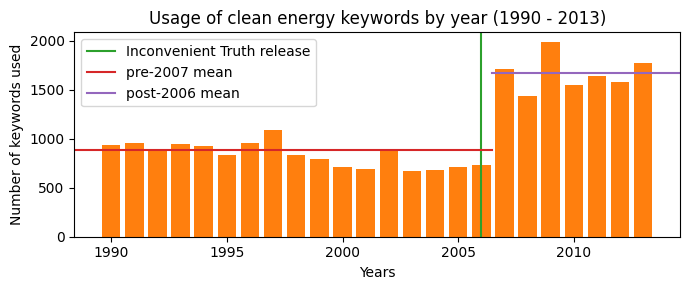

In [32]:
years = data.groupby(by = 'year')['keywords'].sum()

pyplot.figure(figsize = (7, 3))
pyplot.bar(years.index, years, color = 'C1')

pyplot.axvline(2006, color = 'C2', label = 'Inconvenient Truth release')

pyplot.axhline(years.loc[:2007].values.mean(), color = 'C3', label = 'pre-2007 mean', xmax = .69)
pyplot.axhline(years.loc[2007:].values.mean(), color = 'C4', label = 'post-2006 mean', xmin = .69)

pyplot.title('Usage of clean energy keywords by year (1990 - 2013)')
pyplot.ylabel('Number of keywords used')
pyplot.xlabel('Years')
pyplot.legend()

pyplot.tight_layout()
pyplot.savefig('figs/bar.png')
pyplot.show()